In [3]:
# go to the root directory
# %cd /home/studio-lab-user/701-simplicity-bias
# %cd D:/repos/701-simplicity-bias
%cd /root/701-simplicity-bias
import os

assert os.path.exists('./trainers/trainer.py')

/root/701-simplicity-bias


In [6]:
%load_ext autoreload
%autoreload 2
import torch
from trainers import Trainer
import datetime
from logging import Logger, StreamHandler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# follow the config of original paper

model_config = dict(
    cls='fcn',
    num_layers=2,
    input_dim=50,
    output_dim=2,
    latent_dim=100,
    use_bn=False,
    dropout_probability=0.0,
    linear_init=None
)

In [16]:
trainer_logger = Logger('trainer')
trainer_logger.setLevel('DEBUG')
trainer_logger.addHandler(StreamHandler())
trainer_config = dict(
    train_data=dict(
        dataset=dict(
            cls='linear_slabs',
            data_path='./data/lms_7_40000_noisy_train.npz'
        ),
        batch_size=256,
        shuffle=True
    ), val_data=dict(
        dataset=dict(
            cls='linear_slabs',
            data_path='./data/lms_7_40000_noisy_val.npz'
        ),
        batch_size=256,
        shuffle=False
    ),
    additional_data=dict(
        s_randomized=dict(
            dataset=dict(
                cls='linear_slabs',
                data_path='./data/lms_7_40000_noisy_train.npz',
                randomized_axes=(0,)
            ),
            batch_size=256,
            shuffle=False
        ),
        sc_randomized=dict(
            dataset=dict(
                cls='linear_slabs',
                data_path='./data/lms_7_40000_noisy_train.npz',
                randomized_axes=tuple(range(1, 50))
            ),
            batch_size=256,
            shuffle=False
        )
    ),
    model=model_config,
    loss=dict(cls='CE'),
    device='cuda' if torch.cuda.is_available() else 'cpu',
    evaluate_interval=1000,
    save_interval=0,
    work_dir='./training_logs/lms7_noisy_{}/'.format(datetime.datetime.now().strftime('%m%d%H%M')),
    loss_eps=1e-2,
    logger=trainer_logger,
    max_steps=100000,
    optimizer=dict(
        cls='SGD',
        lr=0.1,
        weight_decay=5.0e-5
    )
)
trainer = Trainer(**trainer_config)

model: Sequential(
  (0): Linear(in_features=50, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=2, bias=True)
)


In [17]:
trainer.run()

Step 0: Loss 0.6911386847496033
Evaluating ...


Started, logging to ./training_logs/lms7_noisy_10020543/...


Step: 0
Train/AUC: 0.6051149455789541
Train/AverageLoss: 0.6902636724472045
Train/Accuracy: 0.5353999733924866
Val/AUC: 0.5997117329190134
Val/AverageLoss: 0.6902180103302002
Val/Accuracy: 0.5338000059127808
s_randomized/AUC: 0.5013142584526178
s_randomized/AverageLoss: 0.6936603411674499
s_randomized/Accuracy: 0.5010499954223633
sc_randomized/AUC: 0.6066014057509443
sc_randomized/AverageLoss: 0.6902363285064698
sc_randomized/Accuracy: 0.5335999727249146
Step 1000: Loss 0.11785918474197388
Evaluating ...
Step: 1000
Train/AUC: 0.9953697165464798
Train/AverageLoss: 0.08719102920293809
Train/Accuracy: 0.953249990940094
Val/AUC: 0.9947201570428367
Val/AverageLoss: 0.093360200086236
Val/Accuracy: 0.9487000107765198
s_randomized/AUC: 0.5016157383396287
s_randomized/AverageLoss: 3.683227780532837
s_randomized/Accuracy: 0.4999000132083893
sc_randomized/AUC: 0.9947811546252413
sc_randomized/AverageLoss: 0.09288098688125611
sc_randomized/Accuracy: 0.9502750039100647
Step 2000: Loss 0.08193996548

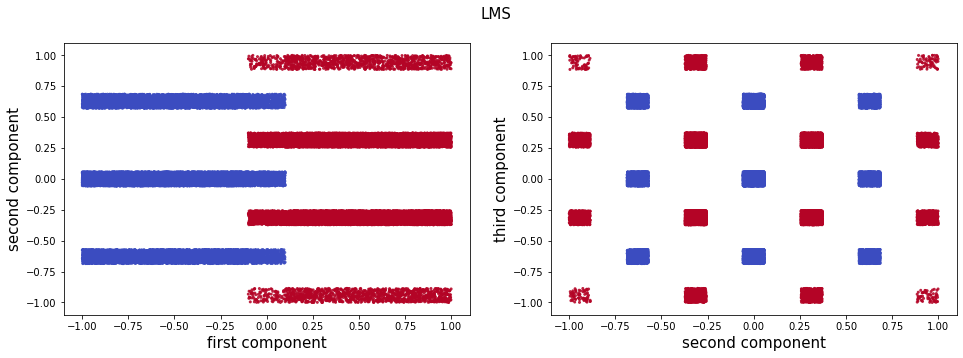

In [18]:
train_dataset = trainer.train_data.dataset
train_dataset.visualize()

In [20]:
ref_trainer_logger = Logger('ref_trainer')
ref_trainer_logger.setLevel('DEBUG')
ref_trainer_logger.addHandler(StreamHandler())
ref_trainer_config = trainer_config.copy()
ref_trainer_config.update(dict(
    train_data=dict(
        dataset=dict(
            cls='linear_slabs',
            data_path='./data/noisy_lms_ref_train.npz'
        ),
        batch_size=256,
        shuffle=True
    ), val_data=dict(
        dataset=dict(
            cls='linear_slabs',
            data_path='./data/noisy_lms_ref_val.npz'
        ),
        batch_size=256,
        shuffle=False
    ),
    additional_data=dict(
        s_randomized=dict(
            dataset=dict(
                cls='linear_slabs',
                data_path='./data/noisy_lms_ref_train.npz',
                randomized_axes=(0,)
            ),
            batch_size=256,
            shuffle=False
        ),
        sc_randomized=dict(
            dataset=dict(
                cls='linear_slabs',
                data_path='./data/noisy_lms_ref_train.npz',
                randomized_axes=tuple(range(1, 50))
            ),
            batch_size=256,
            shuffle=False
        )
    ),
    device='cuda' if torch.cuda.is_available() else 'cpu',
    work_dir='./training_logs/ref_lms7_noisy_{}/'.format(datetime.datetime.now().strftime('%m%d%H%M')),
    logger=ref_trainer_logger,
))
ref_trainer = Trainer(**ref_trainer_config)

model: Sequential(
  (0): Linear(in_features=50, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=2, bias=True)
)


In [21]:
ref_trainer.run()

Step 0: Loss 0.6845872402191162
Evaluating ...


Started, logging to ./training_logs/ref_lms7_noisy_10020600/...


Step: 0
Train/AUC: 0.6562287805276972
Train/AverageLoss: 0.6899697238922119
Train/Accuracy: 0.5045250058174133
Val/AUC: 0.655802148661666
Val/AverageLoss: 0.6884822961807251
Val/Accuracy: 0.513700008392334
s_randomized/AUC: 0.500428842623283
s_randomized/AverageLoss: 0.6962614787101745
s_randomized/Accuracy: 0.5045250058174133
sc_randomized/AUC: 0.6573725029514229
sc_randomized/AverageLoss: 0.6899646164894104
sc_randomized/Accuracy: 0.5045999884605408
Step 1000: Loss 0.08412442356348038
Evaluating ...
Step: 1000
Train/AUC: 0.9952025120737451
Train/AverageLoss: 0.08965875173211098
Train/Accuracy: 0.9530500173568726
Val/AUC: 0.9942063936582841
Val/AverageLoss: 0.09849257919192314
Val/Accuracy: 0.9488999843597412
s_randomized/AUC: 0.5011830043910173
s_randomized/AverageLoss: 3.6429621013641356
s_randomized/Accuracy: 0.5014749765396118
sc_randomized/AUC: 0.9944278986309676
sc_randomized/AverageLoss: 0.09693577845096588
sc_randomized/Accuracy: 0.949400007724762
Step 2000: Loss 0.07036111503

In [23]:
uniform_trainer_logger = Logger('uniform_trainer')
uniform_trainer_logger.setLevel('DEBUG')
uniform_trainer_logger.addHandler(StreamHandler())
uniform_trainer_config = trainer_config.copy()
uniform_trainer_config.update(dict(
    train_data=dict(
        dataset=dict(
            cls='linear_slabs',
            data_path='./data/lms_7_40000_uniform_noisy_train.npz'
        ),
        batch_size=256,
        shuffle=True
    ), val_data=dict(
        dataset=dict(
            cls='linear_slabs',
            data_path='./data/lms_7_40000_uniform_noisy_val.npz'
        ),
        batch_size=256,
        shuffle=False
    ),
    additional_data=dict(
        s_randomized=dict(
            dataset=dict(
                cls='linear_slabs',
                data_path='./data/lms_7_40000_uniform_noisy_train.npz',
                randomized_axes=(0,)
            ),
            batch_size=256,
            shuffle=False
        ),
        sc_randomized=dict(
            dataset=dict(
                cls='linear_slabs',
                data_path='./data/lms_7_40000_uniform_noisy_train.npz',
                randomized_axes=tuple(range(1, 50))
            ),
            batch_size=256,
            shuffle=False
        )
    ),
    work_dir='./training_logs/lms7_uniform_noisy_{}/'.format(datetime.datetime.now().strftime('%m%d%H%M')),
    logger=uniform_trainer_logger
))
uniform_trainer = Trainer(**uniform_trainer_config)

model: Sequential(
  (0): Linear(in_features=50, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=2, bias=True)
)


In [24]:
uniform_trainer.run()

Step 0: Loss 0.6943421363830566
Evaluating ...


Started, logging to ./training_logs/lms7_uniform_noisy_10020610/...


Step: 0
Train/AUC: 0.4236526930761877
Train/AverageLoss: 0.6974391834259033
Train/Accuracy: 0.5076500177383423
Val/AUC: 0.41904832599716074
Val/AverageLoss: 0.6978668378284999
Val/Accuracy: 0.5054857134819031
s_randomized/AUC: 0.46007150958985776
s_randomized/AverageLoss: 0.695647559261322
s_randomized/Accuracy: 0.5217999815940857
sc_randomized/AUC: 0.4626551233890374
sc_randomized/AverageLoss: 0.6954218116760253
sc_randomized/Accuracy: 0.49105000495910645
Step 1000: Loss 0.015561098232865334
Evaluating ...
Step: 1000
Train/AUC: 0.9998471215945307
Train/AverageLoss: 0.022467959851026537
Train/Accuracy: 0.9940750002861023
Val/AUC: 0.9995716790037421
Val/AverageLoss: 0.030152420296839306
Val/Accuracy: 0.9884714484214783
s_randomized/AUC: 0.6139869517024551
s_randomized/AverageLoss: 3.1801388580322265
s_randomized/Accuracy: 0.5670499801635742
sc_randomized/AUC: 0.9915617783374182
sc_randomized/AverageLoss: 0.12321136422157287
sc_randomized/Accuracy: 0.9444249868392944
Step 2000: Loss 0.01

In [25]:
uniform_trainer_longer_config = uniform_trainer_config.copy()
uniform_trainer_longer_config.update(dict(
    loss_eps=1e-6,
    max_steps=29000,
    work_dir='./training_logs/lms7_uniform_longer_noisy_{}/'.format(datetime.datetime.now().strftime('%m%d%H%M')),
))
uniform_trainer_longer = Trainer(**uniform_trainer_longer_config)
uniform_trainer_longer.run()

model: Sequential(
  (0): Linear(in_features=50, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=2, bias=True)
)
Step 0: Loss 0.6907182335853577
Evaluating ...


Started, logging to ./training_logs/lms7_uniform_longer_noisy_10020614/...


Step: 0
Train/AUC: 0.5698173137933271
Train/AverageLoss: 0.6940541104316711
Train/Accuracy: 0.4942750036716461
Val/AUC: 0.574574881711173
Val/AverageLoss: 0.6932300924437387
Val/Accuracy: 0.49799999594688416
s_randomized/AUC: 0.5791870161171568
s_randomized/AverageLoss: 0.6935205021858215
s_randomized/Accuracy: 0.4940750002861023
sc_randomized/AUC: 0.49261082373010084
sc_randomized/AverageLoss: 0.6986947692871094
sc_randomized/Accuracy: 0.4950000047683716
Step 1000: Loss 0.03172649070620537
Evaluating ...
Step: 1000
Train/AUC: 0.9998404383992111
Train/AverageLoss: 0.0236666965842247
Train/Accuracy: 0.9936000108718872
Val/AUC: 0.9995140991682366
Val/AverageLoss: 0.031700806820392606
Val/Accuracy: 0.9887571334838867
s_randomized/AUC: 0.6026017984411098
s_randomized/AverageLoss: 3.26605602722168
s_randomized/Accuracy: 0.5609750151634216
sc_randomized/AUC: 0.9920769106817875
sc_randomized/AverageLoss: 0.11717605922818183
sc_randomized/Accuracy: 0.9463750123977661
Step 2000: Loss 0.01035933